<h2>Decision Tree</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
file='loan1.csv'
df=pd.read_csv(file)

In [3]:
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes


In [4]:
df.shape

(10, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Home Owner            10 non-null object
Marital Status        10 non-null object
Annual Income         10 non-null int64
Defaulted Borrower    10 non-null object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [6]:
d={'Yes':1,'No':0}
df['Home Owner']=df['Home Owner'].map(d)
df['Defaulted Borrower']=df['Defaulted Borrower'].map(d)
d1={'Single':0,'Married':1,'Divorced':2}
df['Marital Status']=df['Marital Status'].map(d1)
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [7]:
df.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [8]:
X=df[['Home Owner', 'Marital Status', 'Annual Income']]
y=df['Defaulted Borrower']
features=list(df.columns[:3])
print(features)


['Home Owner', 'Marital Status', 'Annual Income']


In [9]:
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(X,y)

To install pydotplus

pip install pydotplus

C:\Users\Dell\Anaconda4\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


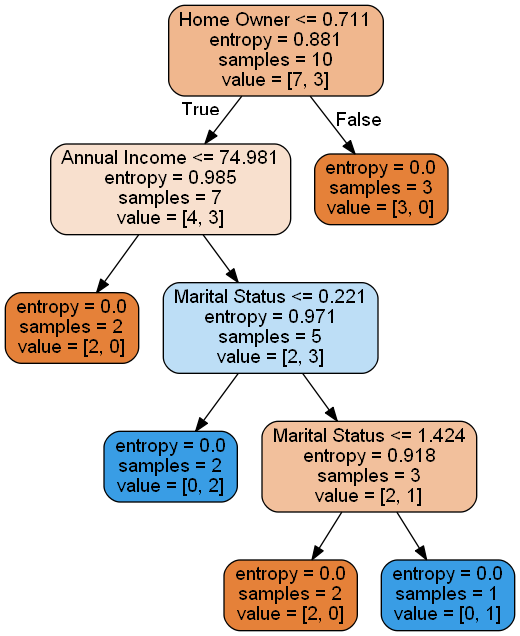

In [10]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus


#Text I/O implementation using an in-memory buffer.
dot_data=StringIO()

#Export a decision tree in DOT format.
#This function generates a GraphViz representation of the decision tree,
#which is then written into `out_file`. Once exported, graphical renderings
#can be generated
tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#Load graph as defined by data in DOT format.
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create a PNG/JPEG/GIF image object given raw data.
Image(graph.create_png())

In [11]:
from sklearn.tree.export import export_text

r = export_text(model, feature_names=features)
print(r)



|--- Home Owner <= 0.71
|   |--- Annual Income <= 74.98
|   |   |--- class: 0
|   |--- Annual Income >  74.98
|   |   |--- Marital Status <= 0.22
|   |   |   |--- class: 1
|   |   |--- Marital Status >  0.22
|   |   |   |--- Marital Status <= 1.42
|   |   |   |   |--- class: 0
|   |   |   |--- Marital Status >  1.42
|   |   |   |   |--- class: 1
|--- Home Owner >  0.71
|   |--- class: 0



In [12]:
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [13]:
model.predict([[0,0,150]])

array([1], dtype=int64)

In [14]:
model.predict([[1,1,150]])

array([0], dtype=int64)

In [16]:
model.predict([[0,2,75]])

array([1], dtype=int64)

In [17]:
model.predict([[1,0,75]])

array([0], dtype=int64)

<h3>Like,Comment and Share this VIDEO</h3>

<h1>SUBSCRIBE TO MY CHANNEL</h1>